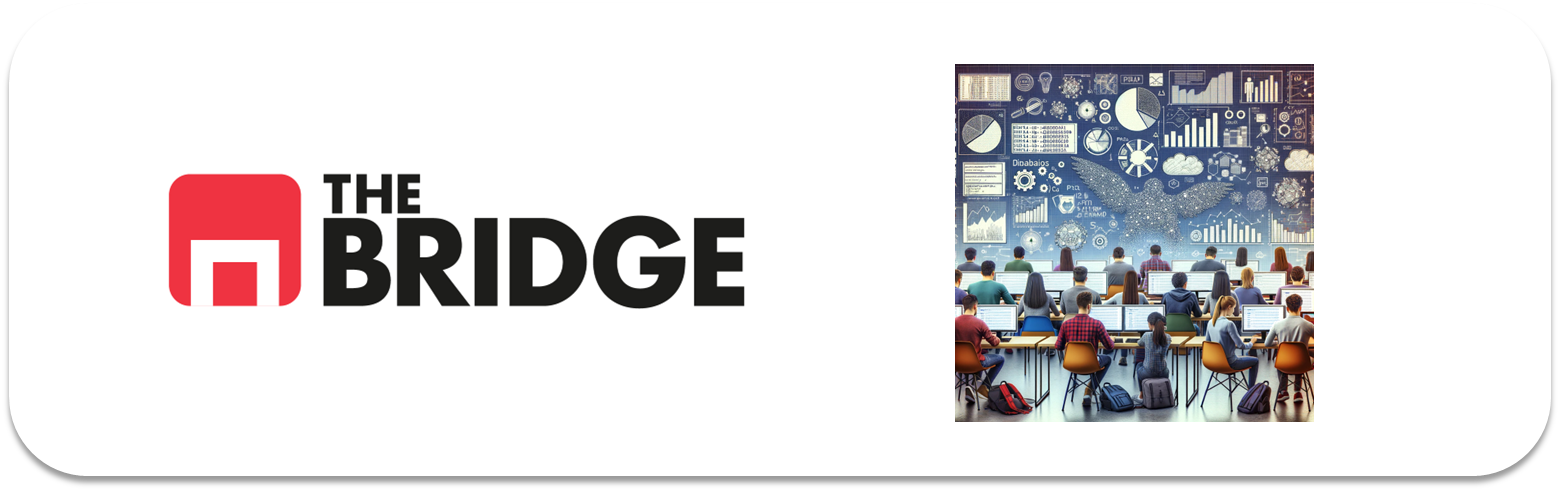

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [35]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

In [8]:
df = pd.read_csv("./obligatoria_hard.csv")
df

,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
0,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
1,0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2...
2,0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2...
3,0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3...
4,0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3...
...,...
501,0.06263|0.0|11.93|0.0|0.573|6.593|69.1|2.4786|...
502,0.04527|0.0|11.93|0.0|0.573|6.12|76.7|2.2875|1...
503,0.06076|0.0|11.93|0.0|0.573|6.976|91.0|2.1675|...
504,0.10959|0.0|11.93|0.0|0.573|6.794|89.3|2.3889|...


Dataset cargado correctamente.


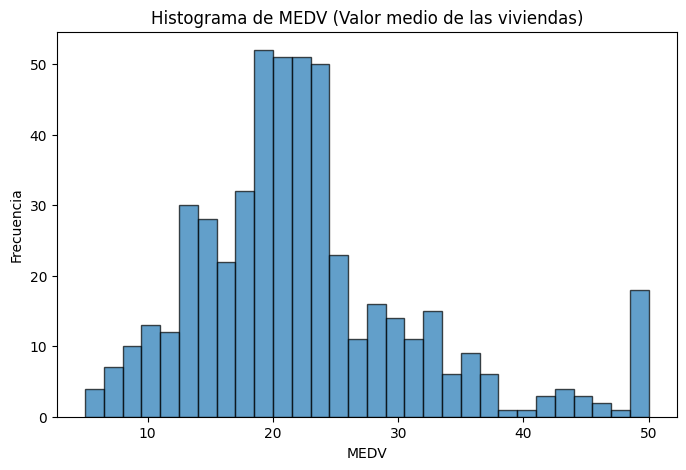

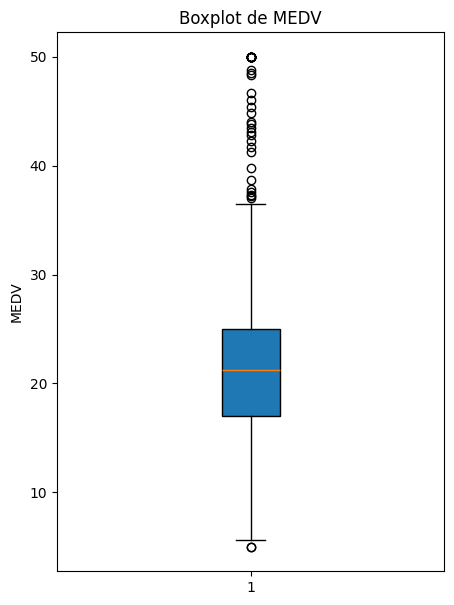

In [11]:
    
    # Hago el histograma de la variable MEDV
    plt.figure(figsize=(8, 5))
    plt.hist(data['MEDV'], bins=30, edgecolor='k', alpha=0.7)
    plt.title('Histograma de MEDV (Valor medio de las viviendas)')
    plt.xlabel('MEDV')
    plt.ylabel('Frecuencia')
    plt.show()

    # Hago el boxplot de la variable MEDV
    plt.figure(figsize=(5, 7))
    plt.boxplot(data['MEDV'], vert=True, patch_artist=True)
    plt.title('Boxplot de MEDV')
    plt.ylabel('MEDV')
    plt.show()

In [16]:
# Hago el split en train y test que creas conveniente y de la forma que creas conveniente
X = data.drop('MEDV', axis = 1)
Y = data['MEDV']


# Construyo las parejas X,y para train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)


Tamaño de X_train: (404, 12)
Tamaño de X_test: (102, 12)


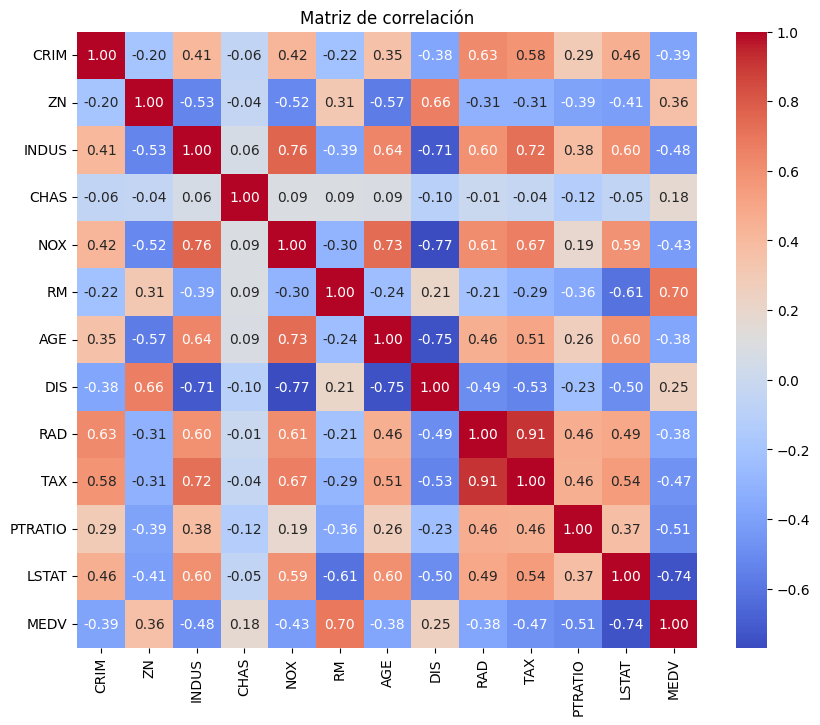

In [17]:
# Hago una matriz de correlación y seleccionlas features que quieres quedarte y por qué.

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


'''
Veo que tiene una alta correlación positiva con mi target (MEDV) la variable RM (0.70) y ZN (0.36). La primera tiene una fuerte correlación positiva, mientras que la segunda no es tan alta. 
Respecto a la correlación negativa están: LSTAT (-0.74), PTRATIO (0.51) y NOX (-0.43)
Tan solo hay dos variables que tienen una corelacción baja que son CHAS (0.18) y DIS (0.25)

TAX y RAD tienen una correlación muy alta (0.91), lo que podría indicar multicolinealidad. 

'''

In [28]:
# Trato las variables para que funcionen lo mejor posible en el modelo, para ello:

# Selecciono las features importantes
features = ['RM', 'LSTAT', 'PTRATIO', 'NOX', 'TAX']
X = data[features]
y = data['MEDV']

feature_names = X_train.columns

# EScalo las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos escalados y transformados:")
print(X_scaled[:5])

Datos escalados y transformados:
[[ 0.41367189 -1.0755623  -1.45900038 -0.14421743 -0.66660821]
 [ 0.19427445 -0.49243937 -0.30309415 -0.74026221 -0.98732948]
 [ 1.28271368 -1.2087274  -0.30309415 -0.74026221 -0.98732948]
 [ 1.01630251 -1.36151682  0.1130321  -0.83528384 -1.10611514]
 [ 1.22857665 -1.02650148  0.1130321  -0.83528384 -1.10611514]]


In [29]:
# Vuelvo a hacer el split para el train y el test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

Tamaño de X_train: (404, 5)
Tamaño de X_test: (102, 5)


In [30]:
# Hago el modelo de regresión lineal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

y_pred = modelo.predict(X_test_scaled)

# Añado las métricas de evalucación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo de regresión lineal:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² (R-squared): {r2:.2f}")



Evaluación del modelo de regresión lineal:
Mean Squared Error (MSE): 32.73
Mean Absolute Error (MAE): 3.63
R² (R-squared): 0.57


In [32]:
coeficientes = modelo.coef_

# Creo un DataFrame con los coeficientes y la importancia relativa
importancia_features = pd.DataFrame({'Feature': feature_names, 'Coeficiente': coeficientes})
importancia_features['Importancia_relativa'] = abs(importancia_features['Coeficiente']) / abs(importancia_features['Coeficiente']).sum()

importancia_features = importancia_features.sort_values(by='Importancia_relativa', ascending=False)

print("A continuación aparecen los coeficientes del modelo y su importancia relativa:")
print(importancia_features)


A continuación aparecen los coeficientes del modelo y su importancia relativa:
     Feature  Coeficiente  Importancia_relativa
0         RM     3.488215              0.356020
1    PTRATIO    -3.423817              0.349447
2        NOX    -2.022856              0.206460
4  LSTAT_log    -0.511510              0.052206
3        TAX    -0.351423              0.035867


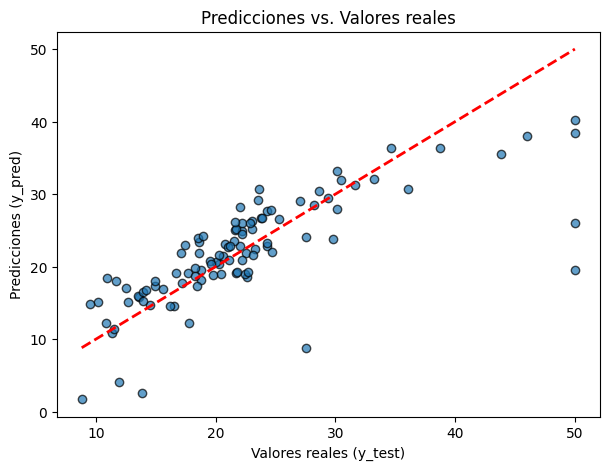

In [33]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs. Valores reales')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.show()


In [36]:
# Pruebo tres valores del hiperparámetro alpha
valores_alpha = [0.1, 1, 10]
resultados = []

for alpha in valores_alpha:
    modelo_ridge = Ridge(alpha=alpha)
    modelo_ridge.fit(X_train_scaled, y_train)

    y_pred_ridge = modelo_ridge.predict(X_test_scaled)

    # Evaluo el modelo
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    resultados.append({
        'alpha': alpha,
        'MSE': mse_ridge,
        'MAE': mae_ridge,
        'R²': r2_ridge
    })

    print(f"\nResultados con alpha = {alpha}:")
    print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
    print(f"R² (R-squared): {r2_ridge:.2f}")

resultados_df = pd.DataFrame(resultados)
print("\nComparación de resultados con diferentes alphas:")
print(resultados_df)



Resultados con alpha = 0.1:
Mean Squared Error (MSE): 32.73
Mean Absolute Error (MAE): 3.63
R² (R-squared): 0.57

Resultados con alpha = 1:
Mean Squared Error (MSE): 32.75
Mean Absolute Error (MAE): 3.62
R² (R-squared): 0.57

Resultados con alpha = 10:
Mean Squared Error (MSE): 32.85
Mean Absolute Error (MAE): 3.62
R² (R-squared): 0.57

Comparación de resultados con diferentes alphas:
   alpha        MSE       MAE        R²
0    0.1  32.733989  3.625313  0.574306
1    1.0  32.745012  3.624729  0.574163
2   10.0  32.852262  3.620309  0.572768
